# Predicting Voter Registration Party Affiliation

Irv Campbell and Steven Dye

Module 4: Logistic Regression

## Problem Statement

### Can we predict what political party voters in North Carolina change to based on their current political party affiliation and by what county they live in?

We attempted to predict what political party voters in North Carolina changed to based on their previous political party and by what county they live in.

## Data

The data was obtained from the North Carolina State Board of Elections website: https://www.ncsbe.gov/index.html on 12/2/2019.

The data consists of six possible political party affiliations: Unaffiliated, Republican, Democratic, Libertarian, Constitutional, and Green. Due to their low frequency, entries that are either joining or leaving the Libertarian, Constitutional, or Green parties were removed. SMOTE data was created to deal with the unbalanced sampling. The new data files were saved in the data folder.


## Data Visualization

We plotted the number record changes per day.

## Methodology

We used train test split and cross validation
We used a Synthetic Minority Over-sampling Technique (SMOTE)
We used a Multinomial Logistic Regression Model to make our predictions.
We used a grid search to find the best hyper parameters
We chose the 'saga' solver for it's speed and for its compatibility with Lasso


## Findings



## Conclusions

## Future Work

Add features to model (how often a voter votes, last time a voter voted, type of election last voted in) and add more data to the model (2018, 2017, etc.)

https://dl.ncsbe.gov/index.html?prefix=ENRS/

In [4]:
#from viz.py import confusion_matrix_heat_map
import numpy as np
import pandas as pd

In [5]:
X_test_df = pd.read_csv('data/X_test.csv')

In [6]:
X_test = np.array(X_test_df)

In [7]:
X_test

array([[0, '  (0, 100)\t1.0\n  (0, 31)\t1.0'],
       [1, '  (0, 100)\t1.0\n  (0, 0)\t1.0'],
       [2, '  (0, 102)\t1.0\n  (0, 92)\t1.0'],
       ...,
       [28879, '  (0, 101)\t1.0\n  (0, 90)\t1.0'],
       [28880, '  (0, 102)\t1.0\n  (0, 59)\t1.0'],
       [28881, '  (0, 101)\t1.0\n  (0, 59)\t1.0']], dtype=object)

In [ ]:
confusion_matrix_heat_map(clf, X_test, y_test)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn import metrics
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 5627

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Records of changing party registration in 2019
df = pd.read_csv('data/2019_party_change_list.csv').drop_duplicates()
df.change_dt = pd.to_datetime(df.change_dt)

In [3]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121585 entries, 0 to 121590
Data columns (total 7 columns):
county_id        121585 non-null int64
 county_name     121585 non-null object
year_change      121585 non-null int64
voter_reg_num    121585 non-null int64
party_from       121585 non-null object
party_to         121585 non-null object
change_dt        121585 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 7.4+ MB


(           county_id  year_change  voter_reg_num
 count  121585.000000     121585.0   1.215850e+05
 mean       54.611539       2019.0   1.191453e+08
 std        27.459117          0.0   2.891173e+08
 min         1.000000       2019.0   2.000000e+00
 25%        32.000000       2019.0   1.444330e+05
 50%        60.000000       2019.0   7.565689e+06
 75%        78.000000       2019.0   3.120599e+07
 max       100.000000       2019.0   1.000549e+09, None)

In [4]:
df.head()

,county_id,county_name,year_change,voter_reg_num,party_from,party_to,change_dt
0,1,ALAMANCE,2019,9091101,REP,UNA,2019-05-31
1,1,ALAMANCE,2019,9151960,REP,UNA,2019-05-31
2,1,ALAMANCE,2019,9160837,REP,UNA,2019-06-03
3,1,ALAMANCE,2019,9064668,REP,UNA,2019-06-03
4,1,ALAMANCE,2019,9159052,DEM,UNA,2019-06-03


/Users/stevedye/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


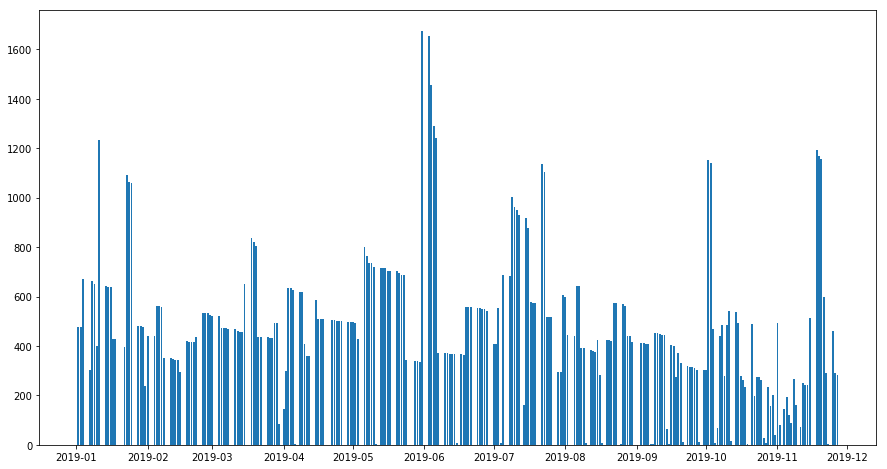

In [20]:
plt.figure(figsize = (15, 8))
plt.bar(df.change_dt.unique(), df.change_dt.value_counts());

In [23]:
clfnc = LogisticRegression(C=1e9, multi_class='multinomial', solver='saga')
clfnc.fit(X_train, y_train)


/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

In [24]:
clfnc.score(X_test, y_test)

0.6792117643188472

In [25]:
clfnc.predict(X_test)

array([5, 5, 4, ..., 5, 1, 1])

In [26]:
y_test

array([5, 4, 4, ..., 4, 4, 4])

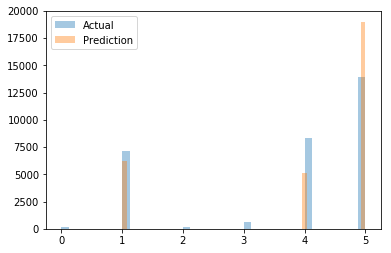

In [27]:
sns.distplot(y_test, kde = False, label="Actual");
sns.distplot(clfnc.predict(X_test), kde = False, label="Prediction")
plt.legend()
plt.show();

In [28]:
nclabels.classes_

array(['CST', 'DEM', 'GRE', 'LIB', 'REP', 'UNA'], dtype=object)

In [29]:
y_train

array([1, 5, 4, ..., 1, 5, 4])

In [30]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 592, 1: 21840, 2: 290, 3: 1880, 4: 24993, 5: 41593}

In [31]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [32]:
unique, counts = np.unique(y_train, return_counts=True)

dict(zip(unique, counts))

{0: 41593, 1: 41593, 2: 41593, 3: 41593, 4: 41593, 5: 41593}

In [33]:
clfnc.fit(X_train, y_train)

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='saga', tol=0.0001,
                   verbose=0, warm_start=False)

In [34]:
clfnc.score(X_train, y_train)

0.34842000657161865

In [35]:
clfnc.score(X_test, y_test)

0.5550876731256374

In [36]:
clfnc.predict(X_test)

array([5, 4, 4, ..., 4, 1, 1])

In [37]:
y_test

array([5, 4, 4, ..., 4, 4, 4])

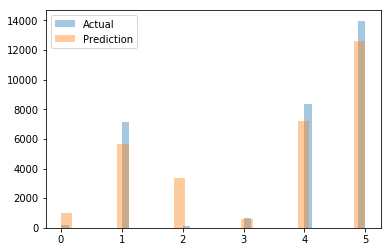

In [38]:
sns.distplot(y_test, kde = False, label="Actual")
sns.distplot(clfnc.predict(X_test), kde=False, label="Prediction")
plt.legend()
plt.show();

In [39]:
clfnc_l1 = LogisticRegression(penalty='l1', C=1.0, multi_class='multinomial', solver='saga')

In [40]:
clfnc_l1.fit(X_train, y_train)

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
clfnc_l1.score(X_train, y_train)

0.34830780820490626

In [42]:
clfnc_l1.score(X_test, y_test) 

0.5566996743099648

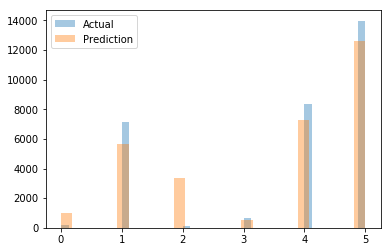

In [58]:
sns.distplot(y_test, kde = False, label="Actual");
sns.distplot(clfnc_l1.predict(X_test), kde = False, label="Prediction")
plt.legend()
plt.show();

In [44]:
clfnc_l1 = LogisticRegression(penalty='l2', C=1.0, multi_class='multinomial', solver='saga')
clfnc_l1.fit(X_train, y_train)

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
print(clfnc_l1.score(X_train, y_train))
print((clfnc_l1.score(X_test, y_test)))

0.3482116381762957
0.5569628581767938


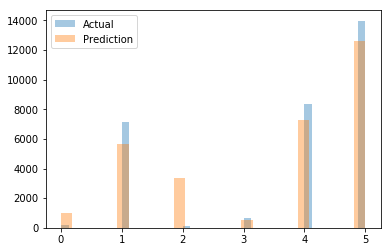

In [59]:
sns.distplot(y_test, kde=False, label="Actual")
sns.distplot(clfnc_l1.predict(X_test), kde=False, label="Prediction")
plt.legend()
plt.show();

In [47]:
cm = metrics.confusion_matrix(y_test, clfnc_l1.predict(X_test))

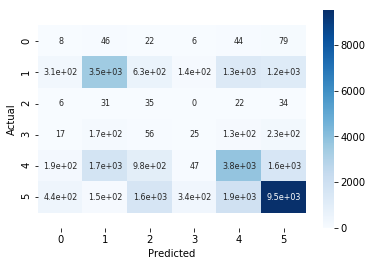

In [48]:
plt.ylim(-10, 10)
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 8})
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show() # ta-da!

In [49]:
cm2 = np.zeros((6, 6))
for row in range(cm.shape[0]):
    cm2[row][:] = (cm[row][:] / sum(cm[row][:]))
cm2

array([[0.03902439, 0.22439024, 0.10731707, 0.02926829, 0.21463415,
        0.38536585],
       [0.04315539, 0.49348466, 0.08827238, 0.01961609, 0.18565223,
        0.16981925],
       [0.046875  , 0.2421875 , 0.2734375 , 0.        , 0.171875  ,
        0.265625  ],
       [0.02694136, 0.27416799, 0.08874802, 0.03961965, 0.20602219,
        0.36450079],
       [0.02306583, 0.20735223, 0.11713119, 0.00564632, 0.45927439,
        0.18753003],
       [0.03156313, 0.01052104, 0.11673347, 0.0240481 , 0.13598626,
        0.68114801]])

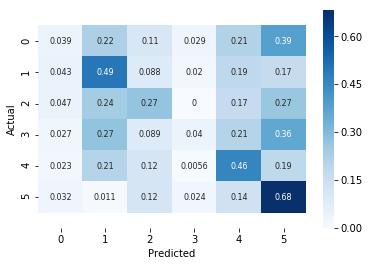

In [50]:
plt.ylim(-10, 10)
sns.heatmap(cm2, cmap="Blues", annot=True,annot_kws={"size": 8})
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show() # ta-da!